In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
avions = pd.read_csv(r"C:\Users\MAITE\Wild Code School\Projet 3 - SkyAnalytics\BDD\fixes\aeronefs_final.csv")
composants = pd.read_csv(r"C:\Users\MAITE\Wild Code School\Projet 3 - SkyAnalytics\BDD\fixes\compo_final.csv")

ANALYSE EXPLORATOIRE DES FICHIERS FIXES

AERONEFS

In [4]:
avions.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27 00:00:00,False,NaN
1,B767_2803,B767,2020-12-03,2024-06-01 00:00:00,False,NaN
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00
3,A350_1177,A350,2005-08-07,2024-01-04 00:00:00,False,NaN
4,B777_4029,B777,2009-01-01,2024-06-01 00:00:00,False,NaN


In [5]:
#combien d'avions dans la société ?
avions['ref_aero'].nunique()

231

In [6]:
#combien de modèle différents
avions['type_model'].nunique()

15

In [7]:
#repartition du nombre d'avions par modèle
avions.groupby('type_model')['ref_aero'].count()

type_model
A320      15
A321      11
A330      20
A340      16
A350      22
A380      17
B737      13
B747      21
B757      11
B767      13
B777      14
CRJ700    15
CRJ900    13
E170      16
E175      14
Name: ref_aero, dtype: int64

Tous les modèles qui commencent par A... c'est Airbus
Tous les modèles qui commencent par B... c'est Boeing
Tous les modèles qui commencent par CRJ... c'est Bombardier (ent. canadienne) -- avions de transport régional biréacteur
Tous les modèles qui commencent par E... c'est Embraer (constructeur brésilien) -- avions destiné aux vols courts et aux connexions

In [8]:
# graphique de repartition du nombre d'avions par modèle
avions_types = avions.groupby('type_model')['ref_aero'].count()
avions_types = avions_types.reset_index()
avions_types.head(1)

,type_model,ref_aero
0,A320,15


In [9]:
avions_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type_model  15 non-null     object
 1   ref_aero    15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [10]:
avions_types['type_model'] = avions_types['type_model'].astype(str)

In [11]:
avions_types['constructeurs'] = ''

In [12]:
for index, row in avions_types.iterrows():
    if row['type_model'].startswith('A'):
        avions_types.at[index, 'constructeurs'] = 'AIRBUS'
    if row['type_model'].startswith('B'):
        avions_types.at[index, 'constructeurs'] = 'BOEING'
    if row['type_model'].startswith('CRJ'):
        avions_types.at[index, 'constructeurs'] = 'BOMBARDIER'
    if row['type_model'].startswith('E'):
        avions_types.at[index, 'constructeurs'] = 'EMBRAER'

In [13]:
avions_types.head(1)

,type_model,ref_aero,constructeurs
0,A320,15,AIRBUS


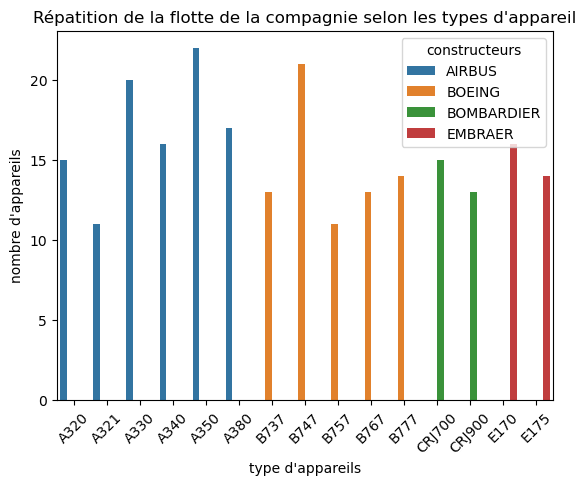

In [14]:
sns.barplot(data=avions_types, x='type_model', y='ref_aero', hue='constructeurs')
plt.xticks(rotation=45)
plt.title("Répatition de la flotte de la compagnie selon les types d'appareil")
plt.xlabel("type d'appareils")
plt.ylabel("nombre d'appareils");

In [15]:
marques_avions = avions_types.groupby('constructeurs').agg(nb_avions=('ref_aero', 'sum'))
marques_avions = marques_avions.reset_index()
marques_avions

,constructeurs,nb_avions
0,AIRBUS,101
1,BOEING,72
2,BOMBARDIER,28
3,EMBRAER,30


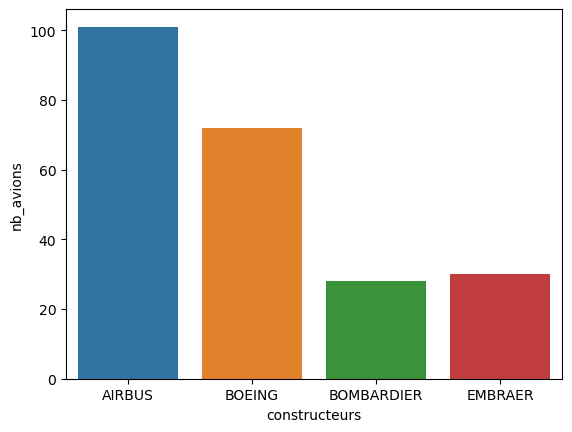

In [16]:
sns.barplot(data=marques_avions, x='constructeurs', y='nb_avions') ;

In [17]:
avions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ref_aero        231 non-null    object
 1   type_model      231 non-null    object
 2   debut_service   231 non-null    object
 3   last_maint      231 non-null    object
 4   en_maintenance  231 non-null    bool  
 5   end_maint       15 non-null     object
dtypes: bool(1), object(5)
memory usage: 9.4+ KB


In [18]:
from datetime import datetime

In [19]:
avions['last_maint'] = avions['last_maint'].str.replace(' 00:00:00', '')

In [20]:
#transformer les colonnes dates du df en format datetime
avions['debut_service'] = pd.to_datetime(avions['debut_service'])
avions['last_maint'] = pd.to_datetime(avions['last_maint'])
avions['end_maint'] = pd.to_datetime(avions['end_maint'])

In [21]:
auj = datetime.today()
auj = pd.to_datetime(auj)
auj

Timestamp('2024-06-14 13:50:37.315654')

In [22]:
avions['age'] = 0

In [23]:
#calculer l'age de chaque appareil (par rapport à la date d'aujourd'hui)
for index, row in avions.iterrows():
    avions.at[index, 'age'] = (auj - row['debut_service']).days // 365.2425

In [24]:
avions.head(1)

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,age
0,E170_6353,E170,2000-03-17,2024-03-27,False,NaT,24


In [25]:
#moyenne d'age des appareils
avions['age'].mean()

12.887445887445887

In [26]:
avions['constructeurs'] = ''
for index, row in avions.iterrows():
    if row['type_model'].startswith('A'):
        avions.at[index, 'constructeurs'] = 'AIRBUS'
    if row['type_model'].startswith('B'):
        avions.at[index, 'constructeurs'] = 'BOEING'
    if row['type_model'].startswith('CRJ'):
        avions.at[index, 'constructeurs'] = 'BOMBARDIER'
    if row['type_model'].startswith('E'):
        avions.at[index, 'constructeurs'] = 'EMBRAER'

In [27]:
#voir la moyenne d'age des avions par marques puis par modèle
avions.groupby('constructeurs')['age'].mean()

constructeurs
AIRBUS        12.009901
BOEING        13.277778
BOMBARDIER    14.392857
EMBRAER       13.500000
Name: age, dtype: float64

In [28]:
avions.groupby(['constructeurs', 'type_model'])['age'].mean()

constructeurs  type_model
AIRBUS         A320          11.866667
               A321          14.181818
               A330          11.050000
               A340          12.687500
               A350          11.727273
               A380          11.588235
BOEING         B737          13.769231
               B747          13.476190
               B757          14.727273
               B767          12.153846
               B777          12.428571
BOMBARDIER     CRJ700        13.333333
               CRJ900        15.615385
EMBRAER        E170          14.312500
               E175          12.571429
Name: age, dtype: float64

Le dernier Boeing 727 assurant des vols réguliers de transport de passagers a pris sa retraite après plus de 38 ans d'activité.
A l'inverse un 777-200LR s'appête à être détruit au Royaume Uni après seulement 11 ans d'activité.
La durée de vie opérationnelle d'un avion commercial est régie par de multiples facteurs qui dépassent les seuls aspects liés à la maintenance.

En aviation, on a l’habitude de dire qu’un avion au sol est un avion qui coûte de l’argent. Plus il est en vol, plus il rapporte.
Les avions court-courriers enchainent atterrissages et décollages de nombreuses fois par jour. A l’opposé, les avions-long-courriers passent beaucoup plus de temps dans les airs pour un temps de rotation plus longs. Alors lequel de ces deux appareils est soumis à davantage de contraintes structurelles ? La réponse n’est pas aussi tranchée.
Les avions court-courriers et moyen-courriers sont soumis à des contraintes différentes mais chacun d’eux a été conçu pour une utilisation qui lui est propre.
Leur durée de vie est comparable, 25 ans en moyenne. Le court-courrier va utiliser davantage de pneus en raison des atterrissages-décollages répétés. En revanche le nombre de cycles, c’est à dire le nombre de vols qu’ils peuvent effectuer, est logiquement bien différent.

chez AF-KLM : Au 31 décembre 2023, l'âge moyen de la flotte en exploitation est de 13,5 ans dont 11,1 ans pour la flotte long-courrier et 17,1 ans pour la flotte moyen-courrier
chez Iberia : 9.60 ans
chez British  : 13.50
chez EMIRATES la moyenne d'age est de 10.30
chez QATAR : 8.80 ans
chez SINGAPOR AIRLINES la moyenne est de 7.2 ans (max 20.50 et mini 4.3)
chez CATHAY : 10.80
chez DELTA 15.20, United : 16.20 et American 13.40
chez ETHIOPIAN : 8.30 ans
chez RAM : 12.9 ans
chez MK : 10.60

notre compagnie a donc une flotte légèrement plus vieillissante que la moyenne

In [29]:
#afficher la derniere maintenance
#afficher la plus vieille maintenance
#y a t'il des avions sans date de derniere maintenance ?
avions['last_maint'].describe()

count                              231
mean     2024-04-11 03:19:28.831168768
min                2023-07-02 00:00:00
25%                2024-02-20 00:00:00
50%                2024-05-31 00:00:00
75%                2024-06-01 00:00:00
max                2024-06-02 00:00:00
Name: last_maint, dtype: object

50% des appareils ont été révisé le 31/05/2024, soit y a 2 semaines

In [30]:
avions['end_maint'].describe()

count                               15
mean     2024-06-05 07:48:59.999999744
min                2024-06-03 14:13:00
25%                2024-06-03 14:13:00
50%                2024-06-03 14:13:00
75%                2024-06-03 14:13:00
max                2024-06-16 14:13:00
Name: end_maint, dtype: object

seulement 15 avions sur 231 sont actuellement en maintenance

In [31]:
#afficher ces avions
avions.loc[avions['en_maintenance'] == True, :]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,age,constructeurs
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00,9,BOMBARDIER
54,CRJ900_4821,CRJ900,2001-09-22,2024-06-02,True,2024-06-03 14:13:00,22,BOMBARDIER
64,A330_2602,A330,2011-06-02,2024-06-02,True,2024-06-03 14:13:00,13,AIRBUS
79,B757_4595,B757,2007-05-01,2024-06-02,True,2024-06-03 14:13:00,17,BOEING
93,B757_2518,B757,2006-05-09,2024-06-02,True,2024-06-16 14:13:00,18,BOEING
95,A330_2982,A330,2009-07-26,2024-06-02,True,2024-06-03 14:13:00,14,AIRBUS
116,E170_2943,E170,2004-11-23,2024-06-02,True,2024-06-03 14:13:00,19,EMBRAER
126,B777_3944,B777,2003-10-29,2024-06-02,True,2024-06-03 14:13:00,20,BOEING
130,A380_6924,A380,2009-01-21,2024-06-02,True,2024-06-03 14:13:00,15,AIRBUS
143,A340_1047,A340,2017-07-30,2024-06-02,True,2024-06-03 14:13:00,6,AIRBUS


la grande majorité des maintenance sont de courte durée : 1 jour
seulement 2 avions sont cloués au sol pour 2 semaines. B757_2518 et CRJ700_1442

COMPOSANTS

In [32]:
composants.head(1)

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,AILA320-A320_1884-20,Composants Majeurs,A320_1884,Ailerons,10524,23.392968,10290


In [33]:
#combien de catégories de composants
composants['categorie'].nunique()

3

In [34]:
#quelles sont t'elles ?
composants['categorie'].value_counts()

categorie
Composants Majeurs        3696
Composants Critiques      3465
Composants Secondaires    3234
Name: count, dtype: int64

In [35]:
composants['categorie'].value_counts(normalize=True)

categorie
Composants Majeurs        0.355556
Composants Critiques      0.333333
Composants Secondaires    0.311111
Name: proportion, dtype: float64

les catégories semblent bien proportionnées. 1/3 des composants pour chacune des 3 catégories

In [36]:
#combien de types de composants (avec desc)
composants['desc'].nunique()

44

In [37]:
#quelles sont t'ils ?
composants['desc'].value_counts()

desc
Système de conditionnement d'air               462
Ailerons                                       231
Autopilote                                     231
Système de surveillance du trafic aérien       231
Système hydraulique principal                  231
Système anti-givre                             231
Système de navigation                          231
Système de contrôle des surfaces de vol        231
Système de pressurisation                      231
Système d'extinction d'incendie                231
Système de divertissement en vol               231
Système d'annonce publique                     231
Systèmes d'oxygène d'urgence                   231
Système d'approvisionnement en eau             231
Système de contrôle de vol                     231
Système de communication radio                 231
Système de gestion de carburant                231
Système d'alerte de proximité au sol (GPWS)    231
Toilettes                                      231
Train d'atterrissage princ

A l'exception des systèmes de conditionnement d'air, il y a autant de type de composants que d'avion. 
On peut en conclure que chaque avion a un composant de chaque type (44) + systèmes de conditionnement d'air (+1)

In [38]:
composants.groupby('aero')['desc'].count()

aero
A320_1884    45
A320_1930    45
A320_2237    45
A320_2497    45
A320_2562    45
             ..
E175_4558    45
E175_5414    45
E175_5586    45
E175_6729    45
E175_6879    45
Name: desc, Length: 231, dtype: int64

In [39]:
#ventilation des types de composants selon les 3 catégories
composants.groupby('categorie')['desc'].value_counts()

categorie               desc                                       
Composants Critiques    Autopilote                                     231
                        Ordinateur de vol                              231
                        Système de gestion de carburant                231
                        Radar météorologique                           231
                        Réacteur droit                                 231
                        Réacteur gauche                                231
                        Système d'alerte de proximité au sol (GPWS)    231
                        Système d'atterrissage automatique             231
                        Système de commande des gaz                    231
                        Système de communication radio                 231
                        Système de contrôle de vol                     231
                        Système de gestion électrique                  231
                        Système 

In [40]:
#quels sont les couts de ces composants ??
composants['cout'].describe()

count    10395.000000
mean     11420.044444
std       5763.305465
min       2021.000000
25%       4801.000000
50%      12664.000000
75%      16266.000000
max      19492.000000
Name: cout, dtype: float64

cout mini = 2000 euro
cout maxi = 19500 euro
Q2 ou médiane 12500 euro

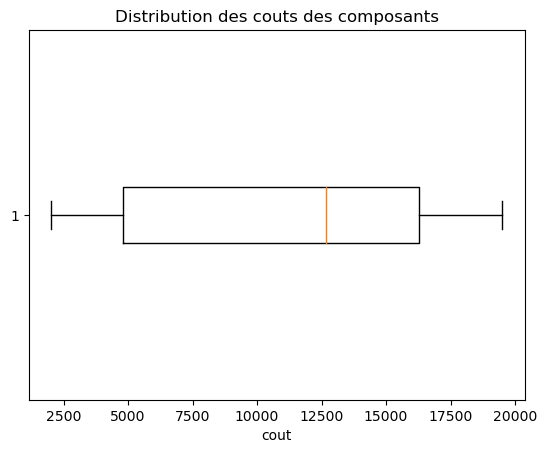

In [45]:
plt.boxplot(composants['cout'], vert=False)
plt.xlabel('cout')
plt.title('Distribution des couts des composants');

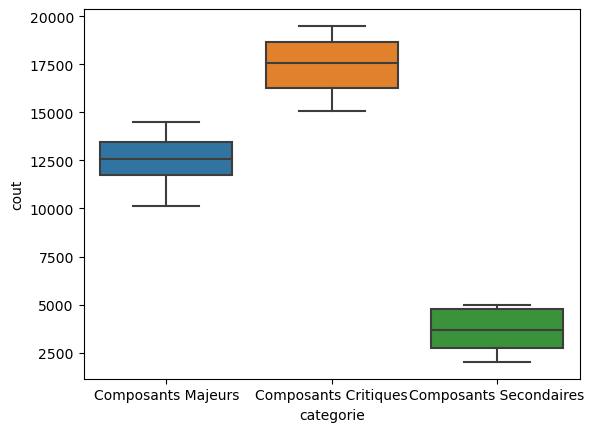

In [64]:
sns.boxplot(data=composants, x='categorie', y='cout') ;

In [46]:
#quelles sont les valeur de la durée de vie des composants
composants['lifespan'].describe()

count    10395.000000
mean     13571.933333
std       8481.016341
min      10023.000000
25%      11015.000000
50%      12643.000000
75%      13626.000000
max      68978.000000
Name: lifespan, dtype: float64

probablement un outlier sur lifespan max

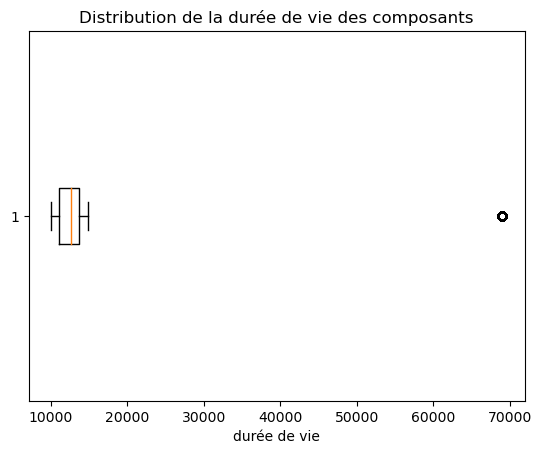

In [48]:
plt.boxplot(composants['lifespan'], vert=False)
plt.xlabel('durée de vie')
plt.title('Distribution de la durée de vie des composants');

In [49]:
composants.loc[composants['lifespan'] > 60000, :]

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
2541,HUBA320-A320_1884-42,Composants Secondaires,A320_1884,Hublots,68978,21.496196,3593
2542,HUBA320-A320_1930-42,Composants Secondaires,A320_1930,Hublots,68978,42.278162,3593
2543,HUBA320-A320_2237-42,Composants Secondaires,A320_2237,Hublots,68978,13.603570,3593
2544,HUBA320-A320_2497-42,Composants Secondaires,A320_2497,Hublots,68978,39.611668,3593
2545,HUBA320-A320_2562-42,Composants Secondaires,A320_2562,Hublots,68978,14.287878,3593
...,...,...,...,...,...,...,...
2767,HUBE175-E175_4558-42,Composants Secondaires,E175_4558,Hublots,68978,5.078538,3593
2768,HUBE175-E175_5414-42,Composants Secondaires,E175_5414,Hublots,68978,47.851384,3593
2769,HUBE175-E175_5586-42,Composants Secondaires,E175_5586,Hublots,68978,58.251448,3593
2770,HUBE175-E175_6729-42,Composants Secondaires,E175_6729,Hublots,68978,24.912690,3593


In [50]:
#8h par jour pendant 365 jours
365 * 8

2920

In [51]:
68978/2920

23.622602739726027

le hublot serait-il programmé pour durer env. 23 ans à raison d'un vol de 8h par jour tous les jours, tous les ans ? 

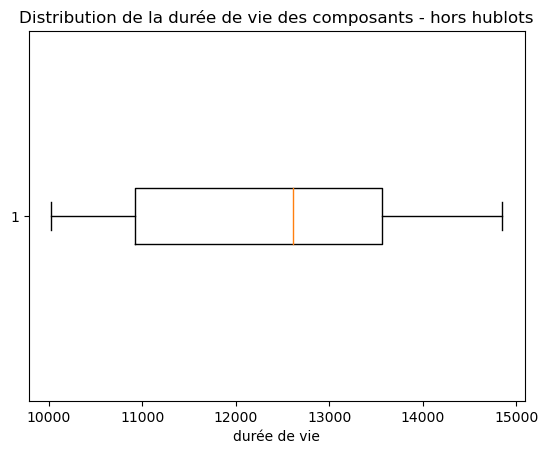

In [54]:
#refaire le boxplot lifespan sans les hublot
plt.boxplot(composants.loc[composants['desc'] != 'Hublots', 'lifespan'], vert=False)
plt.xlabel('durée de vie')
plt.title('Distribution de la durée de vie des composants - hors hublots');

In [58]:
df_lifespan_vs_cat = composants.loc[(composants['desc'] != 'Hublots'), ['categorie', 'lifespan']]
df_lifespan_vs_cat.groupby('categorie')
df_lifespan_vs_cat.head(3)
#plt.xlabel('durée de vie')
#plt.title('Distribution de la durée de vie des composants - hors hublots');

,categorie,lifespan
0,Composants Majeurs,10524
1,Composants Majeurs,10524
2,Composants Majeurs,10524


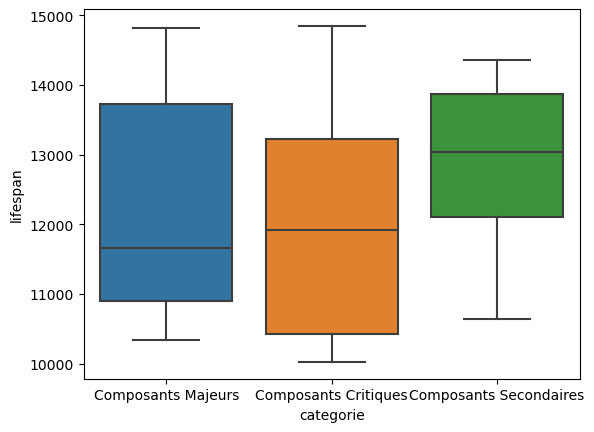

In [62]:
#refaire boxplot pour chaque categorie
sns.boxplot(data=df_lifespan_vs_cat, x='categorie', y='lifespan');

In [65]:
#etude de la variable usure
composants['taux_usure_actuel'].describe()

count    10395.000000
mean        31.158009
std         17.291988
min          0.110000
25%         16.396194
50%         31.213105
75%         46.005899
max         68.910930
Name: taux_usure_actuel, dtype: float64

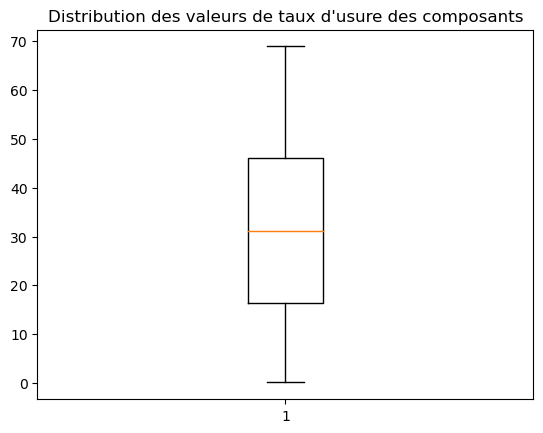

In [69]:
plt.boxplot(composants['taux_usure_actuel'])
plt.title("Distribution des valeurs de taux d'usure des composants");

pour rappel en maintenance préventive les pièces sont toutes remplacées à partir de 75% d'usure
la grande majorité des pièces est bien en-deça de ces valeurs

In [71]:
#voir quelles sont les pièces qui se rapprochent de 70% de tx d'usure
composants.loc[composants['taux_usure_actuel'] >= 65, :]

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
2608,HUBA350-A350_1889-42,Composants Secondaires,A350_1889,Hublots,68978,66.458524,3593
2631,HUBA380-A380_2079-42,Composants Secondaires,A380_2079,Hublots,68978,66.633492,3593
2647,HUBB737-B737_1524-42,Composants Secondaires,B737_1524,Hublots,68978,68.782612,3593
2664,HUBB747-B747_3165-42,Composants Secondaires,B747_3165,Hublots,68978,65.417140,3593
2680,HUBB757-B757_2908-42,Composants Secondaires,B757_2908,Hublots,68978,68.910930,3593
2681,HUBB757-B757_4533-42,Composants Secondaires,B757_4533,Hublots,68978,65.020284,3593
2685,HUBB757-B757_6477-42,Composants Secondaires,B757_6477,Hublots,68978,66.866182,3593
2704,HUBB777-B777_3776-42,Composants Secondaires,B777_3776,Hublots,68978,67.847942,3593
2707,HUBB777-B777_4962-42,Composants Secondaires,B777_4962,Hublots,68978,67.871228,3593


ce sont donc les hublots qui sont les pièces les plus usées mais ce sont aussi ces mêmes pièces qui ont une durée de vie la plus longue

In [75]:
old_compo = composants.loc[(composants['taux_usure_actuel'] <= 65) & (composants['taux_usure_actuel'] >= 60), :]

tableau des composants les plus usés par catégorie et nombre d'avion concernés

In [87]:
old_compo.pivot_table(index=['categorie', 'desc'], aggfunc={'taux_usure_actuel':'mean', 'aero':'count'}).sort_values(['categorie','aero'], ascending=[True,False])

aero  \
categorie              desc                                                
Composants Critiques   Réacteur droit                                  6   
                       Système d'atterrissage automatique              6   
                       Système de gestion électrique                   6   
                       Radar météorologique                            5   
                       Système de commande des gaz                     5   
                       Système de gestion de carburant                 5   
                       Réacteur gauche                                 4   
                       Système de contrôle de vol                      4   
                       Autopilote                                      3   
                       Système d'alerte de proximité au sol (GPWS)     3   
                       Unité de gestion de l'air                       3   
                       Système de communication radio                  2   
                       Système de navigation                           2   
                       Système de surveillance du trafic aérien        2   
                       Ordinateur de vol                               1   
Composants Majeurs     Générateur électrique                           9   
                       Système de conditionnement d'air                8   
                       Système de contrôle des surfaces de vol         7   
                       Système hydraulique principal                   7   
                       Spoilers                                        6   
                       Ailerons                                        5   
                       Système de pressurisation                       5   
                       Gouvernail de direction                         4   
                       Système d'extinction d'incendie                 4   
                       Empennage                                       3   
                       Flaps                                           2   
                       Système anti-givre                              2   
                       Train d'atterrissage avant                      1   
Composants Secondaires Hublots                                        12   
                       Portes passagers                                8   
                       Porte cargo                                     6   
                       Toilettes                                       6   
                       Éclairage d'urgence                             5   
                       Siège copilote                                  4   
                       Système d'annonce publique                      4   
                       Éclairage de cabine                             4   
                       Siège pilote                                    3   
                       Système d'approvisionnement en eau              3   
                       Systèmes d'oxygène d'urgence                    3   
                       Détecteurs de fumée                             2   
                       Système de divertissement en vol                2   
                       Éclairage de la cabine                          2   

                                                                    taux_usure_actuel  
categorie              desc                                                            
Composants Critiques   Réacteur droit                                       60.503763  
                       Système d'atterrissage automatique                   60.979419  
                       Système de gestion électrique                        60.647860  
                       Radar météorologique                                 60.814993  
                       Système de commande des gaz                          60.858026  
                       Système de gestion de carburant                      60.820101  
                   

In [90]:
warning_compo = old_compo.pivot_table(index=['categorie', 'desc'], aggfunc={'taux_usure_actuel':'mean', 'aero':'count'}).sort_values(['categorie','aero'], ascending=[True,False])
warning_compo = warning_compo.reset_index()
warning_compo.head()

,categorie,desc,aero,taux_usure_actuel
0,Composants Critiques,Réacteur droit,6,60.503763
1,Composants Critiques,Système d'atterrissage automatique,6,60.979419
2,Composants Critiques,Système de gestion électrique,6,60.647860
3,Composants Critiques,Radar météorologique,5,60.814993
4,Composants Critiques,Système de commande des gaz,5,60.858026


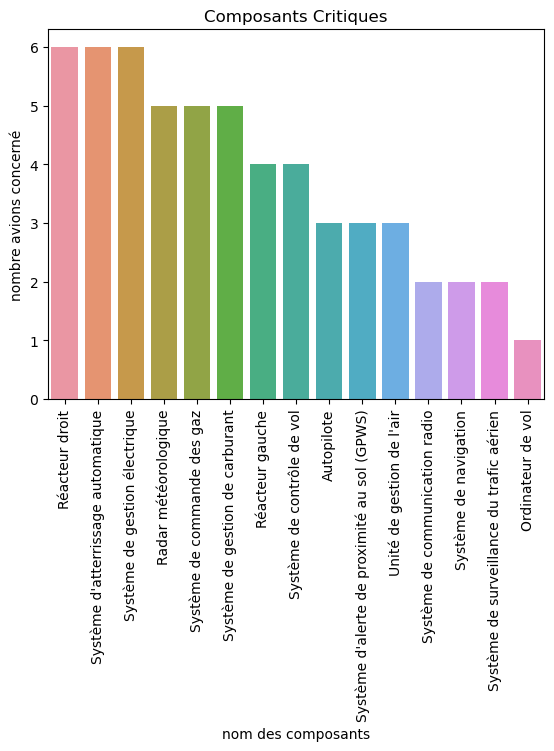

In [122]:
sns.barplot(data=warning_compo.loc[warning_compo['categorie'] == 'Composants Critiques', :], x='desc', y='aero')
plt.xticks(rotation='vertical')
plt.xlabel('nom des composants')
plt.ylabel('nombre avions concerné')
plt.title('Composants Critiques');

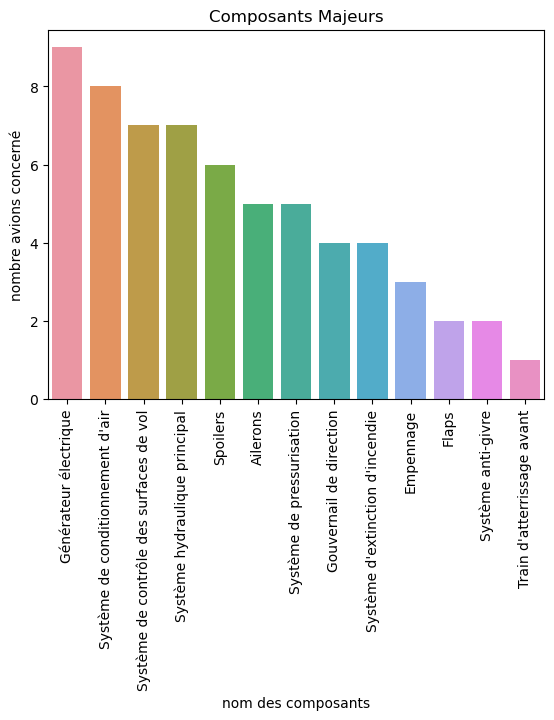

In [123]:
sns.barplot(data=warning_compo.loc[warning_compo['categorie'] == 'Composants Majeurs', :], x='desc', y='aero')
plt.xticks(rotation='vertical')
plt.xlabel('nom des composants')
plt.ylabel('nombre avions concerné')
plt.title('Composants Majeurs');

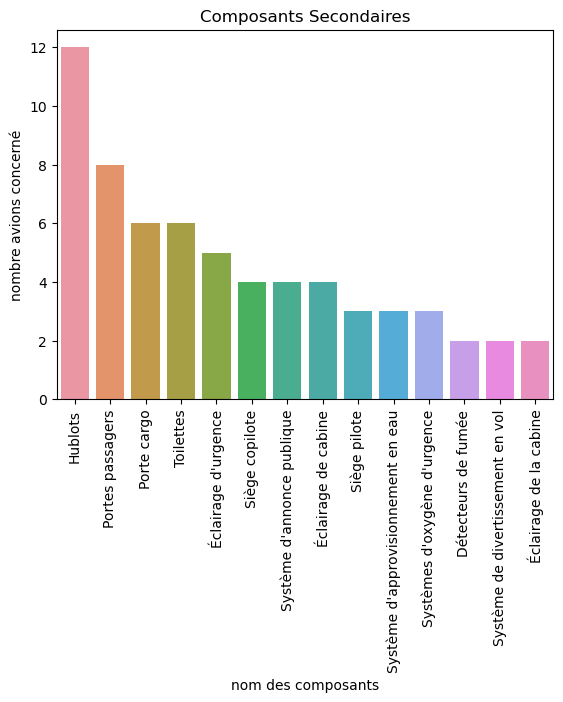

In [124]:
sns.barplot(data=warning_compo.loc[warning_compo['categorie'] == 'Composants Secondaires', :], x='desc', y='aero')
plt.xticks(rotation='vertical')
plt.xlabel('nom des composants')
plt.ylabel('nombre avions concerné')
plt.title('Composants Secondaires');